In [15]:
# Recurrent Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# yfinance alllows us to pull data directly from Yahoo Finance, potentially on a rolling basis
import yfinance as yf 

# Importing the training set
spy_train = yf.download('SPY',
                    start='2010-01-01', 
                    end='2017-01-01', 
                    progress=False)

# always check and make sure your first and last data point lines up with what it is supposed to be
#this pulls the date identidying column into the correct row
# may not need this! spy_train.sort_index(ascending=False, inplace=True)
spy_train.reset_index(level=None, drop=False, inplace=True)
spy_train.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,90.205009,118944600
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,90.443794,111579900
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,90.507477,116074400
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,90.889542,131091100
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,91.191978,126402800
5,2010-01-11,115.080002,115.129997,114.239998,114.730003,91.319366,106375700
6,2010-01-12,113.970001,114.209999,113.220001,113.660004,90.467674,163333500
7,2010-01-13,113.949997,114.940002,113.370003,114.620003,91.231804,161822000
8,2010-01-14,114.489998,115.139999,114.419998,114.930000,91.478546,115718800
9,2010-01-15,114.730003,114.839996,113.199997,113.639999,90.451744,212283100


In [16]:
spy_train.shape

(1762, 7)

In [17]:
# We want to create a numpy arrary not a vector, 1:2
# make sure you enter the number of data points you will be testing on as the first value in iloc
training_set = spy_train.iloc[:1762, 1:2].values

In [18]:
# Feature scaling to optimize the training set

# Apply normalisation in RNN 

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
# Create a data structure with 60 timesteps and 1 output
# 60 T before T and predict the output at T+1
# Takes the data from the last 60 trading periods to most heavily influence predictions
X_train = []
y_train = []
for i in range(60, 1761):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding first LSTM layer and some dropout Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding second LSTM layer and some dropout Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding third LSTM layer and some dropout Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding fourth LSTM layer and some dropout Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding fifth LSTM layer and some dropout Dropout regularisation
# you can use less layers, just make sure final layer does not have return sequence
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

# Adding the Output Layer
regressor.add(Dense(units=1))

# Compiling the RNN
# Because we're doing regression hence mean_squared_error
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# more epochs mean significant lag time in data processing, but more accurate results
# I vary between 100 and 150
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1701/1701 [==============================] - 46s 27ms/step - loss: 0.0443
Epoch 2/100
1701/1701 [==============================] - 41s 24ms/step - loss: 0.0040
Epoch 3/100
1701/1701 [==============================] - 41s 24ms/step - loss: 0.0039
Epoch 4/100
1701/1701 [==============================] - 41s 24ms/step - loss: 0.0038
Epoch 5/100
1701/1701 [==============================] - 41s 24ms/step - loss: 0.0038
Epoch 6/100
1701/1701 [==============================] - 41s 24ms/step - loss: 0.0053
Epoch 7/100
1701/1701 [==============================] - 41s 24ms/step - loss: 0.0033
Epoch 8/100
1701/1701 [==============================] - 41s 24ms/step - loss: 0.0032
Epoch 9/100
1701/1701 [==============================] - 41s 24ms/step - loss: 0.0037
Epoch 10/100
1701/1701 [==============================] - 41s 24ms/step - loss: 0.0027
Epoch 11/100
1701/1701 [==============================] - 41s 24ms/step - loss: 0.0033
Epoch 12/100
1701/1701 [============================

In [26]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price
spy_test = yf.download('SPY',
                    start='2017-01-01', 
                    end='2017-01-15', 
                    progress=False)

spy_test.reset_index(level=None, drop=False, inplace=True)

spy_test
# We want to create a numpy arrary not a vector hence 1:2
#real_stock_price = spy_test.iloc[:, 1:2].values



,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,206.871811,91366500
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,208.102478,78744400
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,207.937195,78379000
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,208.681107,71559900
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,207.992310,46939700
5,2017-01-10,226.479996,227.449997,226.009995,226.460007,207.992310,63771900
6,2017-01-11,226.360001,227.100006,225.589996,227.100006,208.580109,74650000
7,2017-01-12,226.500000,226.750000,224.960007,226.529999,208.056564,72113200
8,2017-01-13,226.729996,227.399994,226.690002,227.050003,208.534195,62717900


In [27]:
real_stock_price = spy_test.iloc[:, 1:2].values

In [28]:
dataset_total = pd.concat((spy_train['Open'], spy_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(spy_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
# first number is same as above trading periods, second number is trading periods plus the nuber of days you are fedding in to the testing model
for i in range(60, 69):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


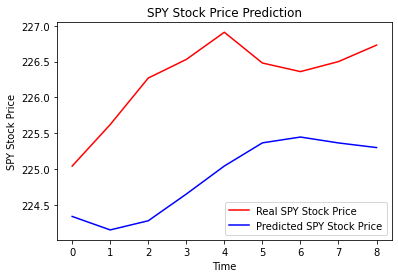

In [29]:
# Visualising the results
plt.plot(real_stock_price, color='Red', label='Real SPY Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted SPY Stock Price')
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()